<a href="https://colab.research.google.com/github/8hehe8/20201101/blob/main/Final_20201101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade d2l

In [29]:
import pandas as pd
import torch
import torchvision
import os
import matplotlib.pyplot as plt
from torch import nn
from d2l import torch as d2l

In [3]:
torch.cuda.get_device_name()

'Tesla P100-PCIE-16GB'

In [47]:
## use pretratin_net to extract image features
pretrained_net = torchvision.models.resnet18(pretrained=True)
# list(pretrained_net.children())[-3:]

In [6]:
def data_tranforms(phase=None):
    if phase == 'train':
        transformed_data = torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=(256,256)),
            torchvision.transforms.CenterCrop(size=224),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
    elif phase == 'test' or phase == 'val':
        transformed_data = torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=(256,256)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
    
    return transformed_data

In [7]:
cd drive/MyDrive/AI_class/Chest_X_Ray_Images/chest_xray/

/content/drive/MyDrive/AI_class/Chest_X_Ray_Images/chest_xray


## num_classes = 2

### train model

In [54]:
train2_dataset = torchvision.datasets.ImageFolder("train_2",
                            transform = data_tranforms('train'))
test2_dataset = torchvision.datasets.ImageFolder("test_2",
                            transform = data_tranforms('test'))

In [55]:
batch_size = 64
train2_loader = torch.utils.data.DataLoader(train2_dataset, batch_size, shuffle=True)
test2_loader = torch.utils.data.DataLoader(test2_dataset, batch_size)

In [56]:
model = pretrained_net

## output layer fc
## need to add classifier
num_classification = 2
model.fc = nn.Linear(model.fc.in_features, num_classification)
nn.init.xavier_uniform_(model.fc.weight)
model.add_module('classifier_2', nn.Sigmoid())

loss 0.001, train acc 0.985, test acc 0.838
609.9 examples/sec on [device(type='cuda', index=0)]


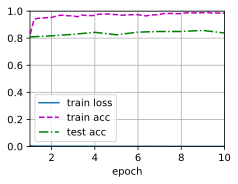

In [57]:
# pretrained된 모델의 parameter를 optimizer에 넘겨준다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-3)
loss_function = nn.CrossEntropyLoss()

model = model.cuda()
loss = loss_function.cuda()

num_epochs = 10

d2l.train_ch13(model, train2_loader, test2_loader, loss, optimizer, num_epochs,
               devices=d2l.try_all_gpus())

In [58]:
torch.save(model.state_dict(), 'model_num_class_2.pth')

## num_classes = 3

In [9]:
train_dataset = torchvision.datasets.ImageFolder("train",
                            transform = data_tranforms('train'))
test_dataset = torchvision.datasets.ImageFolder("test",
                            transform = data_tranforms('test'))

In [10]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size)

In [5]:
model = pretrained_net
## output layer fc
## need to add classifier
num_classification = 3 # for noraml, bacteria, virus
model.fc = nn.Linear(model.fc.in_features, num_classification)
nn.init.xavier_uniform_(model.fc.weight)
model.add_module('classifier_2', nn.Sigmoid())

loss 0.004, train acc 0.917, test acc 0.659
613.2 examples/sec on [device(type='cuda', index=0)]


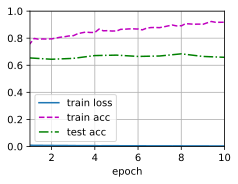

In [33]:
# pretrained된 모델의 parameter를 optimizer에 넘겨준다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-3)
loss_function = nn.CrossEntropyLoss()

model = model.cuda()
loss = loss_function.cuda()

num_epochs = 10

d2l.train_ch13(model, train_loader, test_loader, loss, optimizer, num_epochs,
               devices=d2l.try_all_gpus())

In [ ]:
torch.save(model.state_dict(), 'model_num_class_3.pth')